# Objective : Envelope Detection from the recorded audio

#### What??
##### Envelope refers to the small varying amplitude or magnitude of the signal at low frequency.

#### Why?
##### By detecting the envelope, we can extract the key features which is very crucial for estimating the lungs parameters.

#### How?
##### Approach 1: Using **Hilbert Transform (HT)** methodology to estimate the envelope of audio signals, we just take the positive envelope.

## Import dependcies


In [1]:
from scipy.signal import hilbert, savgol_filter
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import librosa

### Sample audio data when microphone is at C3

In [2]:
# load the audio
# Audio_path = '/kaggle/input/audio-sample-data1/Sample_2_c3.wav'
# Audio_path = '/kaggle/input/audio-sample-data1/Sample_3_L3.wav'
# Audio_path = '/kaggle/input/audio-sample-data1/Sample_4_R3.wav'
# Audio_path = '/kaggle/input/breathing-audio/breathing_earbuds.wav'
# Audio_path = '/kaggle/input/earbuds-aryans-data/021i15-02-16.wav'
Audio_path = '/kaggle/input/finail/Aryan_data.wav'

sample_rate, Audio_data = wavfile.read(Audio_path)

# Time vector
t = np.arange(len(Audio_data)) / sample_rate
print(Audio_data)

[  0   0   0 ... -28 -44 -65]


In [3]:
if Audio_data.ndim > 1:
    Audio_data = np.mean(Audio_data, axis = 1)

#### Display plot of audio data sample


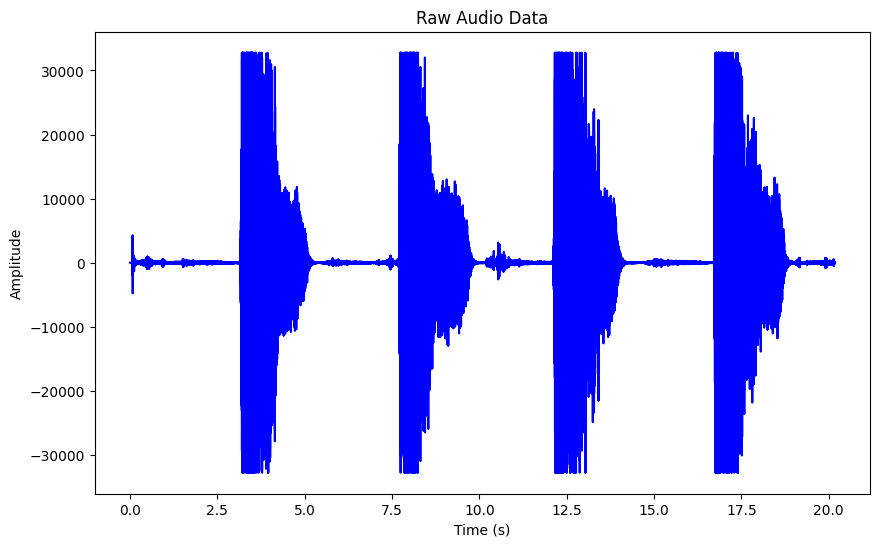

In [4]:
# plot the audio data sample
plt.figure(figsize=(10, 6))
plt.plot(t, Audio_data, label='Original Audio Signal', color='blue')
plt.title('Raw Audio Data')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

##### After Normalized Raw Audio Data

In [5]:
max_Amp = np.max(np.abs(Audio_data))
Normalized_audio_signal = Audio_data.astype(np.float32) / max_Amp

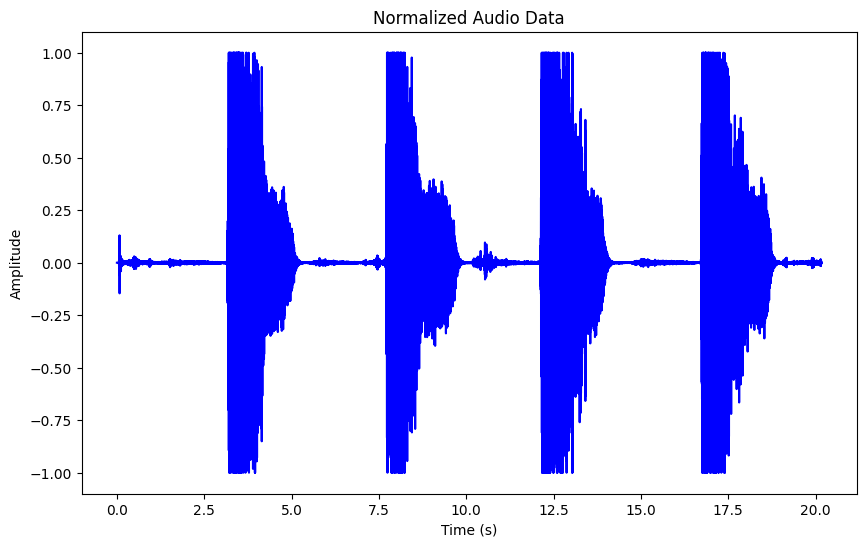

In [6]:
# plot the graph 
plt.figure(figsize=(10, 6))
plt.plot(t, Normalized_audio_signal, label='Normalized Audio Signal', color='blue')
plt.title('Normalized Audio Data')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

##### Apply Hilbert Transform on Normalized audio data to detect the envelope

In [7]:
hilbert_analytic_signal = hilbert(Normalized_audio_signal)
envelope = np.abs(hilbert_analytic_signal)
envelope.shape

(161327,)

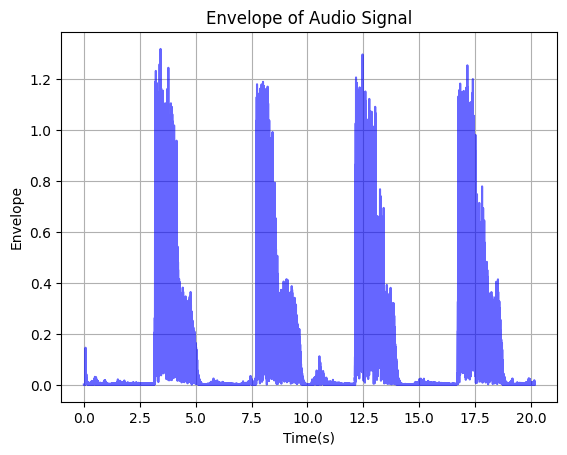

In [8]:
# plot the envelope signal
plt.plot(t, envelope, color='blue', alpha=0.6, linewidth=1.5)
plt.xlabel('Time(s)')
plt.ylabel('Envelope')
plt.title('Envelope of Audio Signal')
plt.grid(True)
plt.show()

#### Smotthen Envelope

In [9]:
def smooth_envelope(envelope,window_size):
    window = np.ones(window_size) / window_size
    smooth_envelope = np.convolve(envelope, window, mode = 'same') 
    return smooth_envelope

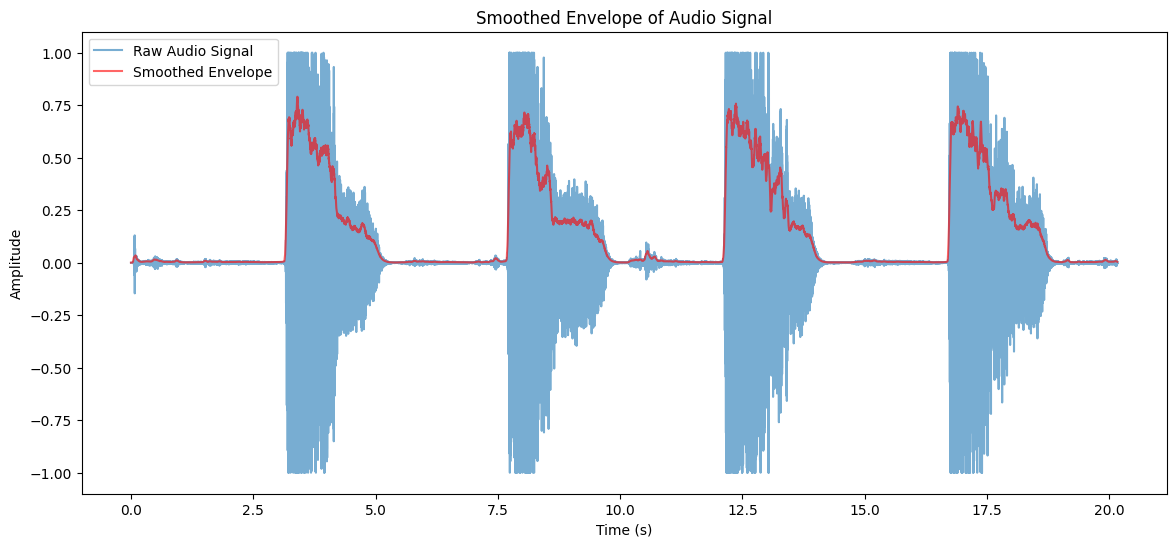

In [10]:
window_size = 480
smoothed_envelope = smooth_envelope(envelope, window_size)

# Create a time vector for plotting
time = np.arange(Audio_data.shape[0]) / sample_rate

# Plot the raw audio signal and its smoothed envelope
plt.figure(figsize=(14, 6))
plt.plot(time, Normalized_audio_signal, label='Raw Audio Signal', alpha=0.6)
plt.plot(time, smoothed_envelope, label='Smoothed Envelope', color='red', alpha=0.6)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Smoothed Envelope of Audio Signal')
plt.legend()
plt.show()

## Estimate the peak

In [12]:
# we used finds_peak method of scipy module
from scipy.signal import find_peaks
signal = envelope
abs_sig = np.abs(signal)
peaks, _ = find_peaks(abs_sig, distance = sample_rate)

# calculate peak time
peak_time = peaks / sample_rate

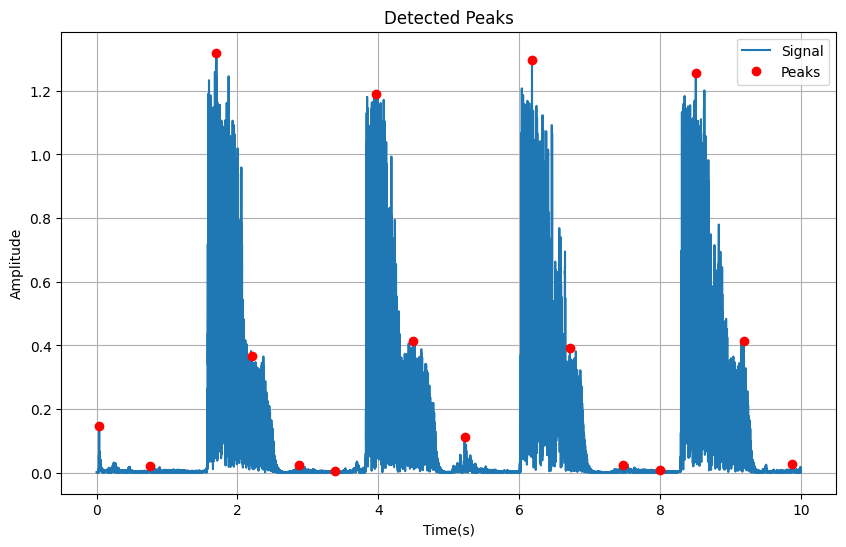

In [13]:
# Generate sample data
x = np.linspace(0, 10, len(abs_sig))

# Plot the signal
plt.figure(figsize=(10, 6))
plt.plot(x, abs_sig, label='Signal')

# Plot peaks and valleys
plt.plot(x[peaks], abs_sig[peaks], 'ro', label='Peaks')

# Add labels and legend
plt.xlabel('Time(s)')
plt.ylabel('Amplitude')
plt.title('Detected Peaks')
plt.legend()

# Show plot
plt.grid(True)
plt.show()

## Evaluate the audio signal (wire audio v/s realme bud audio)

In [14]:
def snr_ratio(signal):
    signal_power = np.mean(signal** 2) # taking mean of squ(signal)
    noise_power = np.mean((signal - np.mean(signal))** 2)
    return 10 * np.log10(signal_power / noise_power)

In [15]:
# comparing the audio
wired_audio = '/kaggle/input/audio-sample-data1/Sample_2_c3.wav'
bud_audio = '/kaggle/input/finail/Aryan_data.wav'

In [16]:
# load the audio_data
w_sr, w_ad = wavfile.read(wired_audio)
b_sr, b_ad = wavfile.read(bud_audio)

# normalized the audio data
w_max_amp = np.max(np.abs(w_ad))
w_norm_ad = w_ad.astype(np.float32) / w_max_amp

b_max_amp = np.max(np.abs(b_ad))
b_norm_ad = b_ad.astype(np.float32) / b_max_amp

# compare the audio quality
w_snr = snr_ratio(w_norm_ad)
b_snr = snr_ratio(b_norm_ad)

In [17]:
print(f'The Sampling rate of wire device: {w_sr} Hz')
print(f'The Sampling rate of buds device: {b_sr} Hz')

The Sampling rate of wire device: 48000 Hz
The Sampling rate of buds device: 8000 Hz


In [18]:
print(f'The SNR ratio of wire audio data: {(w_snr)}')
print(f'The SNR ratio of buds audio data: {(b_snr)}')

The SNR ratio of wire audio data: 5.177193074246134e-07
The SNR ratio of buds audio data: 5.177193074246134e-07
